In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Right CINGULATE of subjects in UKB, HCP, CCD and CCD Controls after implementing a betaVAE with the latent space's size n=32

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load files

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/13-42-25/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/13-42-25/hcp/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/13-42-25/CCD/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/13-42-25/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/13-42-25/hcp/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-17/13-42-25/CCD/Reconstruction_error.csv")

In [3]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [4]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [5]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [6]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [7]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,ag080048,1.152583,-1.601577,-1.129034,0.908235,0.670700,-0.059354,0.609954,-0.608983,1.131563,...,-0.297343,0.759982,0.212893,-1.041033,0.076836,-1.429182,0.352449,2.186355,-0.399179,-0.782989
1,bt080019,-0.441712,-0.026540,1.321242,-1.021556,-1.421322,1.654688,1.958057,-0.062737,-2.092924,...,-0.089861,-0.581041,-0.016342,0.140031,-1.096207,-0.121020,-0.033571,1.381318,0.343160,0.383462
2,ca090293,1.865652,1.490990,-0.648894,-0.177494,-0.741213,-0.522920,0.404744,0.068583,0.065975,...,-0.376107,-0.424645,0.527364,1.013290,-2.662746,-0.046168,-0.905312,0.313512,0.682076,-0.915655
3,cd100556,1.032733,1.321452,0.157201,1.182300,-0.900804,0.682408,-0.937399,-0.103357,-1.575769,...,0.061320,0.853865,0.062516,-0.096692,0.258686,0.361049,0.009610,-0.282334,-0.341631,-0.048664
4,cr070055,1.135805,0.533690,1.706222,0.416522,-1.106195,0.480848,2.203171,0.171331,-1.391920,...,-0.886963,1.386095,-0.332587,0.567101,1.979249,0.297780,2.025325,-0.623219,-0.277418,-0.646426
5,fb070174,0.293328,1.810865,1.968291,-0.059551,-2.943323,0.475003,-0.811882,-0.629204,-0.842672,...,-0.170814,1.207400,0.171918,0.596242,0.215891,0.730177,-0.476685,-1.732340,0.363665,1.027902
6,gd070065,0.604786,-0.418146,0.274187,-0.717366,-1.791334,0.928632,1.467328,-0.216421,-1.816498,...,-0.762413,3.393314,-0.282104,1.454453,0.379312,0.816492,2.121759,-0.864951,-0.105519,-1.653462
7,lc110410,0.828326,0.702612,-0.835544,0.159626,-0.978966,0.737259,1.160455,0.517134,-0.436893,...,0.361884,2.484185,0.053424,1.085990,0.331438,0.401263,2.178899,-1.059653,0.998300,-0.447047
8,md110095,0.667733,-0.914927,-0.978831,-0.634286,-0.529923,-0.046373,0.368611,-0.180363,-2.475517,...,1.520487,-1.526604,-1.903568,-0.166026,0.291188,-0.357662,-1.155485,-0.664152,-0.066279,0.403770
9,mm080047,0.065500,2.215733,0.897427,-0.536166,-0.239000,0.103682,-0.137360,-0.650907,-0.805091,...,-0.434715,0.641878,0.623405,-0.779635,-0.762219,-0.475609,0.534693,-0.173003,1.465514,-1.057201


In [8]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,1146.830322
1,bt080019,2089.155029
2,ca090293,2173.873291
3,cd100556,1759.780029
4,cr070055,2457.077637
5,fb070174,2032.022827
6,gd070065,2878.572266
7,lc110410,2428.925049
8,md110095,1324.818848
9,mm080047,2226.792969


In [9]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [10]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [11]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

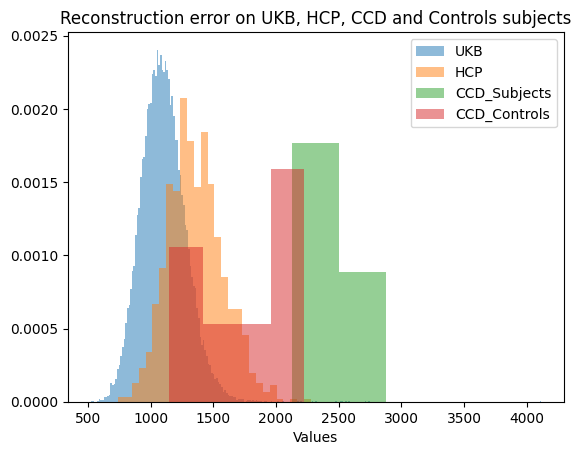

In [12]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [13]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_CCD_Controls.iloc[:,1:76]
X4= Embeddings_CCD_Subjects.iloc[:,1:76]


In [14]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)



/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


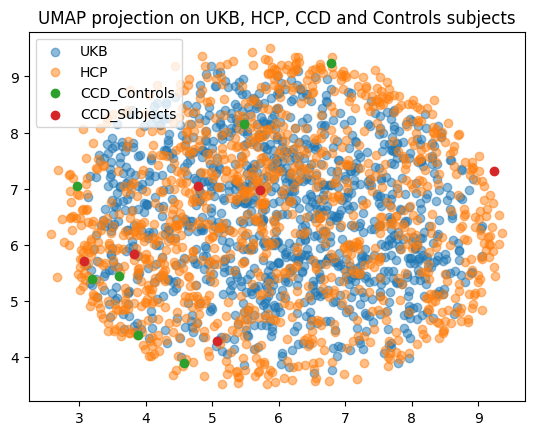

In [15]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="CCD_Subjects")
plt.title("UMAP projection on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [16]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [17]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,1005.253662
1,UKB,1201.095947
2,UKB,1176.202271
3,UKB,1139.456177
4,UKB,985.024780
...,...,...
42428,UKB,1017.356079
42429,UKB,897.251892
42430,UKB,917.682495
42431,UKB,1032.971924


In [18]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:9.248e-03 U_stat=1.740e+03
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:4.662e-03 U_stat=2.000e+00
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:2.958e-15 U_stat=2.000e+00


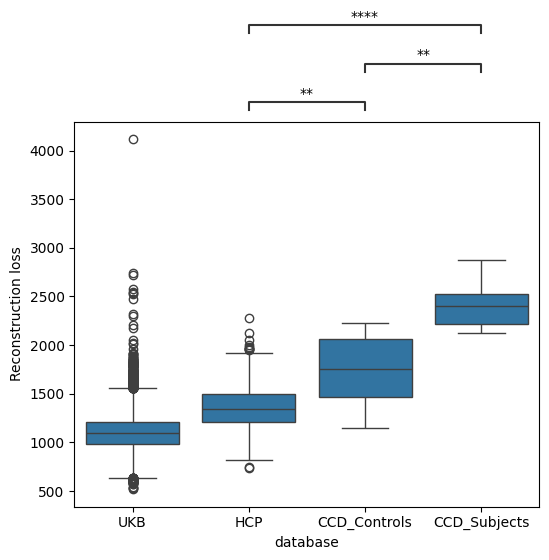

In [19]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()
